In [2]:
import pandas as pd

df = pd.read_csv('train.csv')


In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
cols = ['LotFrontage','LotArea','BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea','TotRmsAbvGrd',
        'GarageArea','OpenPorchSF']
df = df[cols+['YrSold','SalePrice']]
df = df.dropna()
train_raw = df[df.YrSold < 2010]
test_raw = df[df.YrSold >= 2010]

# Random Forest

<font color='red'>Assignment:</font> Build a model with **RandomForestRegressor** to predict **SalePrice** with **cols**.

In [6]:
#import the Random Forest regressor
from sklearn.ensemble import RandomForestRegressor
 
# create the Random Forest regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

df1=df[cols]
#Creating the train datasets
X_train = pd.DataFrame(train_raw[cols])
Y_train = pd.DataFrame(train_raw['SalePrice'])

#Creating the test datasets
X_test= pd.DataFrame(test_raw[cols])
Y_test= pd.DataFrame(test_raw['SalePrice'])

print(X_train)
print(Y_train)
# fit the regressor with x and y data and assign it to rf_model
rf_model=regressor.fit(X_train,Y_train) 

#predict the value
Y_pred_random_forest= rf_model.predict(X_test)
print("Predicted values are: ",Y_pred_random_forest)







      LotFrontage  LotArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0            65.0     8450         706           0        150          856   
1            80.0     9600         978           0        284         1262   
2            68.0    11250         486           0        434          920   
3            60.0     9550         216           0        540          756   
4            84.0    14260         655           0        490         1145   
...           ...      ...         ...         ...        ...          ...   
1452         35.0     3675         547           0          0          547   
1453         90.0    17217           0           0       1140         1140   
1454         62.0     7500         410           0        811         1221   
1455         62.0     7917           0           0        953          953   
1459         75.0     9937         830         290        136         1256   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  TotRmsAbvGrd

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Predicted values are:  [127132.08       316132.32       201387.37       137271.6
 212629.18       117476.5        167844.22        83826.
 149257.         147549.1        155037.63       105751.27
 125622.5        174188.2        187589.32       234159.95
 305428.56       111172.         145162.62       221865.91
 229590.56       250418.17       179207.05       147225.71
 166333.02       132097.16       132752.75       121594.82
 201327.5        146729.22       242712.31       114460.29
 152839.18       138093.51       263699.85       213593.1
 112068.59       214423.87       175864.26       104304.28333333
  90574.11       155896.35       108583.61       323204.04
 144140.25714286 173887.68       149712.87       111504.86
 137640.97       214017.74       264867.8         95548.43
 149981.08       171703.02       149955.07238095  86100.61
 142748.5        146204.9        154987.32       141666.82
 176541.84        94669.         142060.2        120964.33
 193410.69       114777.78     

<font color='red'>Assignment:</font> Calculate the train/test scores.

In [11]:
#Train and test scores for the random forest 
from sklearn.metrics import mean_squared_error as MSE
print(MSE(Y_test, Y_pred_random_forest))

print('Random Forest Regressor score for train is:', regressor.score(X_train, Y_train))

print('Random Forest Regressor score for test is:', regressor.score(X_test, Y_test))

964289742.9483594
Random Forest Regressor score for train is: 0.9663458860333919
Random Forest Regressor score for test is: 0.8709824974585985


<font color='red'>Assignment:</font> Plot the feature importance in a bar chart.

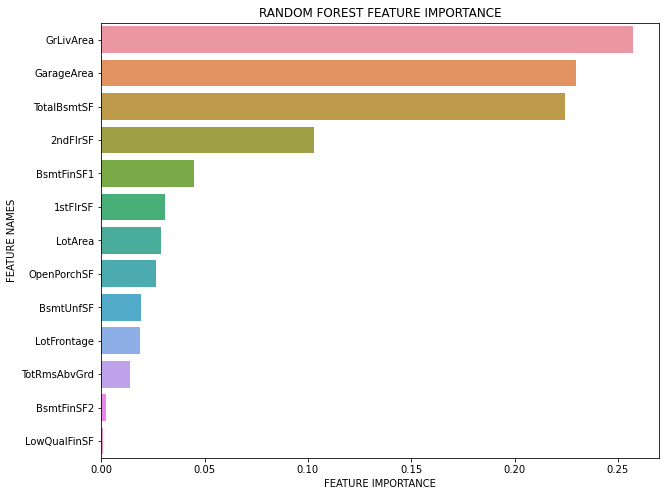

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

importance = rf_model.feature_importances_
names=cols

def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

  
plot_feature_importance(importance,cols,'RANDOM FOREST ')




<font color='red'>Question:</font> How does Random Forest work? Why is it better than a single decision tree?

random forests are a strong modeling technique and much more robust than a single decision tree. They aggregate many decision trees to limit overfitting as well as error due to bias and therefore yield useful results.

<font color='red'>Question:</font> Why is Random Forest better than a single decision tree? How does it decrease model error? How does it affect bias and virance?

Random forests are a strong modeling technique and much more robust than a single decision tree. They aggregate many decision trees to limit overfitting as well as error due to bias and therefore yield useful results.

<font color='red'>Question:</font> What is Bagging?

Bagging, also known as bootstrap aggregation, is the ensemble learning method that is commonly used to reduce variance within a noisy dataset. In bagging, a random sample of data in a training set is selected with replacement—meaning that the individual data points can be chosen more than once.

After several data samples are generated, these weak models are then trained independently, and depending on the type of task—regression or classification, for example—the average or majority of those predictions yield a more accurate estimate. 

<font color='red'>Assignment:</font> Tune hyperparameters with k-fold cross validation to optimize model performance.

In [80]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=5)
#k_fold.split(X_train, Y_train)

#cv = cross_validate(rf_model, X_train, Y_train, cv=5)
#print(cv['test_score'])
#print(cv['test_score'].mean())

cv = cross_validate(rf_model, X_test, Y_test, cv=5)
print(cv['test_score'])
print(cv['test_score'].mean())






/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[0.63684538 0.81399105 0.72878667 0.7532689  0.61768167]
0.710114732450795


<font color='red'>Question:</font> What are the hyper parameters which can effetively affect model performance? How do they affect the performance respectively?

In [67]:
regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

The most important hyper-parameters of a Random Forest that can be tuned are:

The Nº of Decision Trees in the forest (in Scikit-learn this parameter is called n_estimators)
The criteria with which to split on each node (Gini or Entropy for a classification task, or the MSE or MAE for regression)
The maximum depth of the individual trees. The larger an individual tree, the more chance it has of overfitting the training data, however, as in Random Forests we have many individual trees, this is not such a big problem.
The minimum samples to split on at an internal node of the trees. Playing with this parameter and the previous one we could regularise the individual trees if needed.
Maximum number of leaf nodes. In Random Forest this is not so important, but in an individual Decision Tree it can greatly help reduce over-fitting as well and also help increase the explainability of the tree by reducing the possible number of paths to leaf nodes. 
Number of random features to include at each node for splitting.
The size of the bootstrapped dataset to train each Decision Tree with.

Main parameter: max_features
around sqrt(n_features) for classication
Around n_features / 3 for regression
n_estimators > 100
Prepruning might help, denitely helps with model size!
max_depth, max_leaf_nodes, min_samples_split again

# Gradient Boosting Trees

In [ ]:
#Creating the train and test datasets.
import pandas as pd
X_train = pd.DataFrame(train_raw[cols])
Y_train = pd.DataFrame(train_raw['SalePrice'])

X_test= pd.DataFrame(test_raw[cols])
Y_test= pd.DataFrame(test_raw['SalePrice'])
#print(X_train)

<font color='red'>Assignment:</font> Build a model with **GradientBoostingRegressor** to predict **SalePrice**.

In [56]:
#import the regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE

# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 1)#random_state = SEED)
  
# Fit to training set
gbr_model=gbr.fit(X_train, Y_train)
  
# Predict on test set
Y_pred = gbr.predict(X_test)
Y_pred_gbr = gbr_model.predict(X_test)

#print(Y_pred)
print(Y_pred_gbr)
  
# test set RMSE
test_rmse = MSE(Y_test, Y_pred) ** (1 / 2)
  
# Print rmse
print('RMSE test set: {:.2f}'.format(test_rmse))


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[134697.70346202 292938.91149577 206174.86062357 140142.55974894
 242879.51308407 115855.71118618 154636.4515772  104769.40911548
 133345.4565903  145987.74207576 194479.9048068  109453.50848988
 107276.16684368 174190.33011735 198663.20554787 262486.52925915
 396115.79442315  99881.94633472 171263.482853   249729.47275555
 237541.27045685 241834.94640638 191852.02980339 154465.85895234
 149435.54568032 121043.08544413 128262.12462752 105866.75769058
 177665.20412082 153365.06621336 252158.8555984  104029.30780345
 160404.63002992  91599.80826492 255252.2973938  204370.54882238
 128315.60107302 275451.02538968 186710.62731894 104976.79596077
 110446.67236768 161612.9894391  102355.07340194 325820.03917537
 144120.44710225 151115.59894336 154959.67128061 109814.36481634
 140831.41302215 228138.08512695 258383.32419527  98279.97740122
 167030.28945095 188345.71968755 138910.67771233  80417.21174872
 133876.63531821 138441.0298175  159640.25136775 152136.5428037
 193750.46529835 104976.79

<font color='red'>Assignment:</font> Calculate the train/test scores.

In [20]:
#Train and test scores for the random forest 
from sklearn.metrics import mean_squared_error as MSE
print("MSE: ",MSE(Y_test, Y_pred_gbr))

#MAE
from sklearn.metrics import mean_absolute_error as MAE
print("MAE: ",MAE(Y_test, Y_pred_gbr))

#R2 SCORE
from sklearn.metrics import r2_score as r2
print("R2 :",r2(Y_test, Y_pred_gbr))

print('Random Forest Regressor score for train is:', gbr.score(X_train, Y_train))

print('Random Forest Regressor score for test is:', gbr.score(X_test, Y_test))



MSE:  1401914344.7287495
MAE:  24816.28431657663
R2 : 0.8124303521254452
Random Forest Regressor score for train is: 0.8343004653564616
Random Forest Regressor score for test is: 0.8124303521254452


<font color='red'>Assignment:</font> Plot the feature importance in a bar chart.

array([0.00272167, 0.01279908, 0.06853511, 0.        , 0.00352729,
       0.25694181, 0.01223006, 0.05784833, 0.00815615, 0.34186608,
       0.        , 0.20089226, 0.03448216])

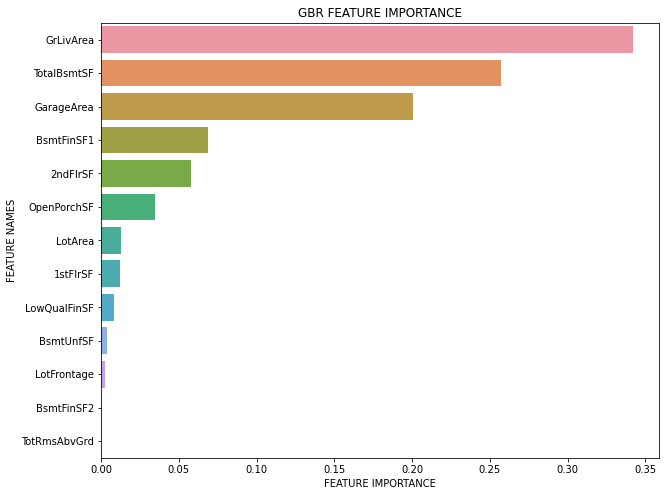

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

importance = gbr_model.feature_importances_
names=cols
display(importance)
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order of decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

  
plot_feature_importance(importance,cols,'GBR ')



<font color='red'>Question:</font> How does gradient boosting tree work? 

Gradient boosting works by building simpler (weak) prediction models sequentially where each model tries to predict the error left over by the previous model. Because of this, the algorithm tends to overfit rather quick

<font color='red'>Question:</font> What is boosting?

Boosting is an ensemble learning method that combines a set of weak learners into a strong learner to minimize training errors. 
In boosting, a random sample of data is selected, fitted with a model and then trained sequentially—that is, each model tries to compensate for the weaknesses of its predecessor. 
With each iteration, the weak rules from each individual classifier are combined to form one, strong prediction rule. 

<font color='red'>Question:</font> Compare gradient boosting trees and random forest. What are the pros and cons of these two models?

 GBT build trees one at a time, where each new tree helps to correct errors made by previously trained tree.

**Pros of the model** (Gradient Boosting Trees)
Since boosted trees are derived by optimizing an objective function, basically GBM can be used to solve almost all objective function that we can write gradient out. This including things like ranking and poission regression, which RF is harder to achieve.

**Cons of the model** (Gradient Boosting Trees)
GBMs are more sensitive to overfitting if the data is noisy.
Training generally takes longer because of the fact that trees are built sequentially.
GBMs are harder to tune than RF. There are typically three parameters: number of trees, depth of trees and learning rate, and each tree built is generally shallow.


Gradient Boosting
Slower to train than RF (serial), but much faster to predict
Small model size
Typically more accurate than Random Forests

**Random Forest**: RFs train each tree independently, using a random sample of the data. This randomness helps to make the model more robust than a single decision tree, and less likely to overfit on the training data.

**Pros of the model**Random Forest **bold text**
RF is much easier to tune than GBM. There are typically two parameters in RF: number of trees and number of features to be selected at each node.
RF is harder to overfit than GBM.

**Weaknesses of the model (Random Forest) **bold text**
The main limitation of the Random Forests algorithm is that a large number of trees may make the algorithm slow for real-time prediction.
For data including categorical variables with different number of levels, random forests are biased in favor of those attributes with more levels. Therefore, the variable importance scores from random forest are not reliable for this type of data. Methods such as partial permutations were used to solve the problem [7].
If the data contain groups of correlated features of similar relevance for the output, then smaller groups are favored over larger groups [7].


#When to use tree based models

Model non-linear relationships
Doesn’t care about scaling, no need for feature engineering
Single tree: very interpretable (if small)
Random forests very robust, good benchmark
Gradient boosting often best performance with careful tuning

<font color='red'>Assignment:</font> Tune hyperparameters to optimize model performance.

In [61]:
print(gbr.get_params())

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


Pick n_estimators, tune learning rate
Can also tune max_features
Typically strong pruning via max_depth

<font color='red'>Question:</font> What are the hyper parameters which can effetively affect model performance? How do they affect the performance respectively?

In [64]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


Boosting uses three main tuning parameters: the number of trees, a shrinkage parameter and the number of splits per tree


The number of weak learners for ensemble learning can be specified by the parameter n_estimators.  Also, the size of each weak learner can be pre-determined two different ways: by specifying tree depth (max_depth) or setting the number of leaf nodes (max_leaf_nodes). The learning rate is the shrinkage parameter, which controls overfitting and ranges between 0.0 and 1.0.  Regression trees are first grown as the base learner, and subsequent tree ensembles are grown using the errors of the prior tree.

A simple GBM model contains two categories of hyperparameters: boosting hyperparameters and tree-specific hyperparameters.

# XGBoost

<font color='red'>Assignment:</font> Build a model with **XGBRegressor** to predict **SalePrice**.

In [22]:
#import the regressor
from xgboost import XGBRegressor

#create a regressor object
regressor_boost = XGBRegressor()

x_gbr_model=regressor_boost.fit(X_train, Y_train)

Y_pred_x_gbr = x_gbr_model.predict(X_test)

Y_pred_x_gbr

[23:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([132812.05 , 309763.06 , 201166.36 , 140691.1  , 219723.28 ,
       114845.26 , 172819.95 ,  91963.65 , 142542.75 , 144468.16 ,
       144258.89 , 108667.695, 116947.61 , 177923.97 , 191506.39 ,
       258220.66 , 302756.8  , 105700.55 , 147467.84 , 246458.25 ,
       220893.39 , 247620.5  , 189959.94 , 148108.   , 161643.78 ,
       125107.33 , 132654.84 , 109804.37 , 194650.31 , 147152.98 ,
       258170.88 , 107915.84 , 163591.27 , 115112.72 , 271803.1  ,
       217414.97 , 123084.37 , 268524.34 , 180111.75 , 103316.39 ,
        97642.24 , 158825.88 , 101709.01 , 305374.66 , 137791.02 ,
       165814.39 , 151561.53 , 113227.984, 140691.1  , 240246.86 ,
       272191.3  ,  99094.87 , 159712.47 , 182767.55 , 140017.1  ,
        75260.19 , 134407.52 , 136919.48 , 153109.66 , 161120.42 ,
       182881.83 ,  95642.97 , 139437.5  , 116714.086, 185443.73 ,
       116731.21 , 190894.27 , 211260.98 ,  87050.63 , 122397.84 ,
       263071.47 , 230179.98 ,  92534.9  , 189621.45 , 182925.

<font color='red'>Assignment:</font> Calculate the train/test scores.

In [55]:
#Train and test scores for the random forest 
from sklearn.metrics import mean_squared_error as MSE
print("MSE: ",MSE(Y_test, Y_pred_gbr))

from sklearn.metrics import mean_absolute_error as MAE
print("MAE: ",MAE(Y_test, Y_pred_gbr))

from sklearn.metrics import r2_score as R2
print("R2: ",R2(Y_test, Y_pred_gbr))

#x_gbr_model.score((X_train, Y_train))

print(f'Random Forest Regressor score for train is:  {regressor_boost.score(X_train, Y_train)}')

print('Random Forest Regressor score for test is:', regressor_boost.score(X_test, Y_test))




MSE:  1401914344.7287495
MAE:  24816.28431657663
R2:  0.8124303521254452
Random Forest Regressor score for train is:  0.9082407560187724
Random Forest Regressor score for test is: 0.8134990328366796


<font color='red'>Assignment:</font> Plot the feature importance in a bar chart.

array([0.00886068, 0.02592081, 0.04270709, 0.0094418 , 0.00843205,
       0.30204538, 0.03123013, 0.11610133, 0.00610578, 0.15615954,
       0.01274473, 0.24078858, 0.0394622 ], dtype=float32)

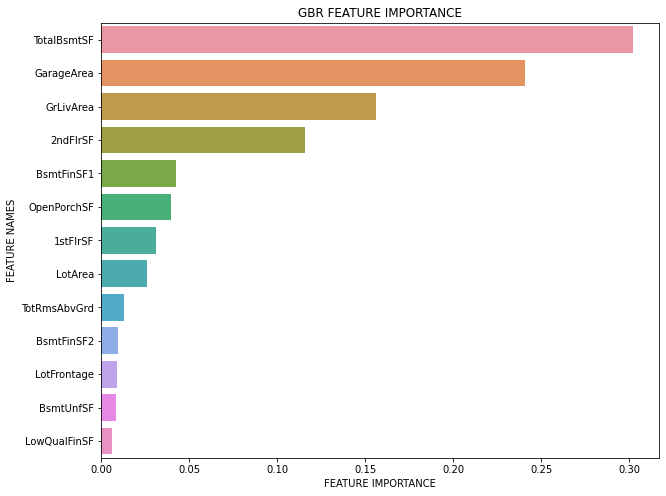

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

importance = x_gbr_model.feature_importances_
names=cols
display(importance)
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order of decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

  
plot_feature_importance(importance,cols,'GBR ')

<font color='red'>Assignment:</font> Tune hyperparameters to optimize model performance.

In [58]:
params={ 'objective':'reg:squarederror',
         'max_depth': 6, 
         'colsample_bylevel':0.5,
         'learning_rate':0.01,
         'random_state':20}
#cv_results = regressor_boost.cv(dtrain=X_train, params=params, nfold=10, metrics={'rmse'}, as_pandas=True, seed=20, num_boost_round=1000)
#print('RMSE: %.2f' % cv_results['test-rmse-mean'].min())

<font color='red'>Question:</font> What are the hyper parameters which can effetively affect model performance? How do they affect the performance respectively?

First focus on optimizing max_depth and n_estimators.


Then play along with the learning_rate

In [63]:
regressor_boost.get_params()



{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

For XGBoost, we’ll optimize n_estimators, max_depth, reg_alpha, reg_lambda, min_child_weight, num_boost_round, and gamma.

<font color='red'>Question:</font> What is the relationship and difference between Xgboost and gradient boosting trees? Why Xgboost performs better than graident boosting trees?

XGBoost vs Gradient Boosting
XGBoost is a more regularized form of Gradient Boosting. XGBoost uses advanced regularization (L1 & L2), which improves model generalization capabilities. XGBoost delivers high performance as compared to Gradient Boosting. Its training is very fast and can be parallelized across clusters.